Text is everywhere in the form of opinions, complaints, news and information; each of us contributes to generating this text throughout the internet. This large amount of text present in the unstructured format can be used for society and businesses' welfare. Commonly available text can not be directly used for analysis, it needs to be pre-processed first, and that is where NLTK, the most popular library for text processing in Python, comes into the picture.

In this notebook, we will perform Exploratory data Analysis and perform visualization on tweets on stock market data. We will scrap tweets from the internet and save the tweets into CSV, and will be using the CSV to fetch the records in the panda's data frame and perform analysis and visualization on Twitter data. So, get ready to dive into Twitter Stock Market Analysis.

# Actions to be performed are:


1. __<a href='#1' target='_self'>Import Libraries</a>__
1. __<a href='#2' target='_self'>Fetch Tweets</a>__
    1. __<a href='#2A' target='_self'>Using tweepy</a>__
1. __<a href='#3' target='_self'>Saving tweets into CSV</a>__ 
    1. __<a href='#3A' target='_self'>Using CSV Module</a>__
1. __<a href='#4' target='_self'>Text Pre-processing</a>__
    1. __<a href='#4A' target='_self'>Pre-processing 'Key Words'</a>__
        1. <a href='#4Aa' target='_self'>Removing '@names'</a>
        1. <a href='#4Ab' target='_self'>Removing links (http | https)</a>
        1. <a href='#4Ac' target='_self'>Removing tweets with empty text</a>
        1. <a href='#4Ad' target='_self'>Dropping duplicate rows</a>
        1. <a href='#4Ae' target='_self'>Removing Punctuations, Numbers and Special characters</a>
        1. <a href='#4Af' target='_self'>Removing Stop words</a>
        1. <a href='#4Ag' target='_self'>Removing words with length less than 2.</a>
        1. <a href='#4Ah' target='_self'>Converting words to Lemma </a>
        1. <a href='#4i' target='_self'>Joining all tokens into sentences</a>
1. __<a href='#5' target='_self'>Story Generation and Visualization</a>__
    1. __<a href='#5A' target='_self'>Most common words in tweets</a>__
    1. __<a href='#5B' target='_self'>Count of Top 20 users who tweeted on the given keywords in assignment</a>__
    1. __<a href='#5B' target='_self'>Count of daily tweets</a>__
    1. __<a href='#5C' target='_self'>Count of daily user tweeting</a>__

In [1]:
import os
import tweepy as tw
import pandas as pd
import json
import csv
import re

<h1><center>Getpass module to hide input parameters</center></h1>
Getpass is the module in python provides the method getpass.getpass that is used in the program to enter the input without echoing the input, this way the customer_key,customer_secret,access_token and access_token_secret values will not be visible on screen and this allows us to pass the values securely. Read the python document which lead you to find this intresenting module, below is the link where you can read about this module.

link:- https://docs.python.org/3/library/getpass.html

In [5]:
import getpass
#consumer_key = getpass.getpass(prompt='Please enter the consumer key: ', stream=None)
#consumer_secret=getpass.getpass(prompt='Please enter the consumer secret: ', stream=None)
#access_token=getpass.getpass(prompt='Please enter the access token: ', stream=None)
#access_token_secret=getpass.getpass(prompt='Please enter the access token secret: ', stream=None)
consumer_key ='jH1aF56EyC9mO4PG4khGDctQN'
consumer_secret='a01XtxbKDINwEJWxZRDBJiYVXShnClN5PtmInr4bL6XdD5fsNN'
access_token='168495678-eTnEuL98gxcb7ckas5WnvNuXKriqgU75GtvYBu20'
access_token_secret='w2ofktHV0LPv9hLx66mtYtbWQA2nDiRweqBbgAEF5Ww9J'

<h1><center>Fetching data using Tweepy and Storing it in CSV</center></h1>
We now pass the consumer key and consumer secret in the auth api of tweepy, and pass the access token and access token secret in the auth.set_access_token api , we then invoke the twitter api with tweepy we can now search for the hashtags and pass it in the API with cursor method which will fetch us the data in json, we then call the CSV writer module in python and write the four coloumns in the CSV as timestamp,tweet_text,user_id(username) and tweet_id(id), these four fields will be extracted from the Json data and will be populated in the CSV, the tweepy API limits the rate to 3200 tweets in one API call which is the rate limit set by twitter in tweepy, we manually adjusted the date parameter which can also be adjusted by creating a function and calling that function, but we used manual process here.

In [6]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [19]:
search_words = input('Please enter the word to search for: ')

Please enter the word to search for: #Yahoo


In [26]:
csvFile = open('Yhoo2.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)
#csvWriter.writerow(['timestamp', 'tweet_text', 'user_id', 'tweet_id'])

for tweet in tw.Cursor(api.search,q=search_words,
                           lang="en",
                           until='2021-02-10').items():
    ##print (tweet.created_at, tweet.text)
    
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'),tweet.user.screen_name.encode('utf-8'),tweet.id_str])

In [7]:
df = pd.read_csv(r"Yhoo2.csv")

In [8]:
df.head()

,timestamp,tweet_text,user_id,tweet_id
0,3/4/2021 22:07,b'RT @davidchenpanda: Thanks Yahoo News for pl...,b'Nuker_46',1.367600e+18
1,3/4/2021 21:21,b'RT @davidchenpanda: Thanks Yahoo News for pl...,b'JanusEsports',1.367590e+18
2,3/4/2021 21:04,b'Thanks Yahoo News for placing me in Top 20 @...,b'davidchenpanda',1.367580e+18
3,3/4/2021 20:56,"b'It\xe2\x80\x99s not NOT rodeo either, though...",b'ajmikesmith',1.367580e+18
4,3/4/2021 20:09,b'I ain\xe2\x80\x99t sorry anymore for that sh...,b'doge2mooon',1.367570e+18


In [9]:
df['tweet_text'].head(n=10)

0    b'RT @davidchenpanda: Thanks Yahoo News for pl...
1    b'RT @davidchenpanda: Thanks Yahoo News for pl...
2    b'Thanks Yahoo News for placing me in Top 20 @...
3    b'It\xe2\x80\x99s not NOT rodeo either, though...
4    b'I ain\xe2\x80\x99t sorry anymore for that sh...
5    b'Git Along, Lil\xe2\x80\x99 DOGE! Dallas Mavs...
6    b'For your fantasy sports leagues this year, c...
7    b'RT @AMWebSchool: Most visited websites globa...
8    b'Most visited websites globally\n\n10. #Amazo...
9    b"RT @orion_protocol: ORION'S MONTHLY ROUND UP...
Name: tweet_text, dtype: object

In [10]:
df.shape

(289, 4)

<h1><center>Dropping duplicate rows in tweet_text</center></h1>

We now dropped the duplicate rows in the tweet_text, to get all the unique tweets in last 7 days.

In [11]:
df.drop_duplicates(subset='tweet_text',inplace=True)

In [12]:
df.shape

(107, 4)

<h1><center>Text preporcessing</center></h1>

We will start cleaning our data, we first extratcted all the hashtags in column hastag, we then imported the nltk module to clean the data the following steps are performed in this:-
1. __<a href='#1' target='_self'>Removing puntuations</a>__
1. __<a href='#1' target='_self'>Removing numbers</a>__
1. __<a href='#1' target='_self'>Removing @names</a>__
1. __<a href='#1' target='_self'>Removing words less than 2</a>__
1. __<a href='#1' target='_self'>Removing links (http|https)</a>__
1. __<a href='#1' target='_self'>Stemming words</a>__
1. __<a href='#1' target='_self'>Using Stopwords and adding custom Stopwords</a>__

In [13]:
df['hashtag'] = df['tweet_text'].apply(lambda x: re.findall(r"#(\w+)", x))

df.head(n=10)

,timestamp,tweet_text,user_id,tweet_id,hashtag
0,3/4/2021 22:07,b'RT @davidchenpanda: Thanks Yahoo News for pl...,b'Nuker_46',1.367600e+18,[]
2,3/4/2021 21:04,b'Thanks Yahoo News for placing me in Top 20 @...,b'davidchenpanda',1.367580e+18,[]
3,3/4/2021 20:56,"b'It\xe2\x80\x99s not NOT rodeo either, though...",b'ajmikesmith',1.367580e+18,[Yahoo]
4,3/4/2021 20:09,b'I ain\xe2\x80\x99t sorry anymore for that sh...,b'doge2mooon',1.367570e+18,[yahoo]
5,3/4/2021 19:19,"b'Git Along, Lil\xe2\x80\x99 DOGE! Dallas Mavs...",b'Patsoup78',1.367560e+18,[]
6,3/4/2021 17:20,"b'For your fantasy sports leagues this year, c...",b'BenSMeyers',1.367530e+18,[]
7,3/4/2021 17:14,b'RT @AMWebSchool: Most visited websites globa...,b'EtsyGrowth',1.367520e+18,"[Amazon, Yahoo, Taobao, Tmall, QQ]"
8,3/4/2021 17:13,b'Most visited websites globally\n\n10. #Amazo...,b'AMWebSchool',1.367520e+18,"[Amazon, Yahoo, Taobao, Tmall]"
9,3/4/2021 15:54,"b""RT @orion_protocol: ORION'S MONTHLY ROUND UP...",b'Diego_Sisneros',1.367500e+18,[]
10,3/4/2021 14:56,b'@aditiraval This tweet remind me of #Yahoo r...,b'mojilo_manas',1.367490e+18,[Yahoo]


In [14]:
from nltk.corpus import stopwords

In [15]:
extra_stop = ['rt','rts','retweet','b']
excluded_words = set().union(stopwords.words('english'),extra_stop)

In [16]:
excluded_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'b',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own

In [17]:
df['cleaned_tweet_text'] = df['tweet_text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .str.replace('rt','')

In [21]:
df.cleaned_tweet_text.head(n=10)

0     b  thanks yahoo news for placing me in top 20 ...
2     b thanks yahoo news for placing me in top 20 a...
3     b it xe2 x80 x99s not not rodeo either though ...
4     b i ain xe2 x80 x99t sorry anymore for that sh...
5     b git along lil xe2 x80 x99 doge dallas mavs t...
6     b for your fantasy spos leagues this year cons...
7     b  most visited websites globally n n10 amazon...
8     b most visited websites globally n n10 amazon ...
9     b  orion s monthly round up xf0 x9f x9a x80 n ...
10    b this tweet remind me of yahoo rooms xf0 x9f ...
Name: cleaned_tweet_text, dtype: object

In [19]:
df['cleaned_tweet_text_excluded_words'] =  df['tweet_text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in excluded_words])

In [20]:
df.cleaned_tweet_text_excluded_words.head(n=10)

0     [thanks, yahoo, news, placing, top, 20, accoun...
2     [thanks, yahoo, news, placing, top, 20, accoun...
3        [xe2, x80, x99s, rodeo, either, though, yahoo]
4     [xe2, x80, x99t, sorry, anymore, shitty, compa...
5     [git, along, lil, xe2, x80, x99, doge, dallas,...
6     [fantasy, sports, leagues, year, consider, don...
7     [visited, websites, globally, n, n10, amazon, ...
8     [visited, websites, globally, n, n10, amazon, ...
9     [orion, monthly, round, xf0, x9f, x9a, x80, n,...
10    [tweet, remind, yahoo, rooms, xf0, x9f, x98, x82]
Name: cleaned_tweet_text_excluded_words, dtype: object

In [22]:
from nltk.stem import PorterStemmer

In [23]:
stemmer = PorterStemmer()
df['stemmed_data'] = df['cleaned_tweet_text_excluded_words'].apply(lambda x: [stemmer.stem(i) for i in x if i != ''])

In [24]:
df['stemmed_data'].head(n=10)

0     [thank, yahoo, news, place, top, 20, account, ...
2     [thank, yahoo, news, place, top, 20, account, ...
3         [xe2, x80, x99, rodeo, either, though, yahoo]
4     [xe2, x80, x99t, sorri, anymor, shitti, compan...
5     [git, along, lil, xe2, x80, x99, doge, dalla, ...
6     [fantasi, sport, leagu, year, consid, donat, p...
7     [visit, websit, global, n, n10, amazon, n9, ya...
8     [visit, websit, global, n, n10, amazon, n9, ya...
9     [orion, monthli, round, xf0, x9f, x9a, x80, n,...
10     [tweet, remind, yahoo, room, xf0, x9f, x98, x82]
Name: stemmed_data, dtype: object

In [25]:
df.head(n=10)

,timestamp,tweet_text,user_id,tweet_id,hashtag,cleaned_tweet_text,cleaned_tweet_text_excluded_words,stemmed_data
0,3/4/2021 22:07,b'RT @davidchenpanda: Thanks Yahoo News for pl...,b'Nuker_46',1.367600e+18,[],b thanks yahoo news for placing me in top 20 ...,"[thanks, yahoo, news, placing, top, 20, accoun...","[thank, yahoo, news, place, top, 20, account, ..."
2,3/4/2021 21:04,b'Thanks Yahoo News for placing me in Top 20 @...,b'davidchenpanda',1.367580e+18,[],b thanks yahoo news for placing me in top 20 a...,"[thanks, yahoo, news, placing, top, 20, accoun...","[thank, yahoo, news, place, top, 20, account, ..."
3,3/4/2021 20:56,"b'It\xe2\x80\x99s not NOT rodeo either, though...",b'ajmikesmith',1.367580e+18,[Yahoo],b it xe2 x80 x99s not not rodeo either though ...,"[xe2, x80, x99s, rodeo, either, though, yahoo]","[xe2, x80, x99, rodeo, either, though, yahoo]"
4,3/4/2021 20:09,b'I ain\xe2\x80\x99t sorry anymore for that sh...,b'doge2mooon',1.367570e+18,[yahoo],b i ain xe2 x80 x99t sorry anymore for that sh...,"[xe2, x80, x99t, sorry, anymore, shitty, compa...","[xe2, x80, x99t, sorri, anymor, shitti, compan..."
5,3/4/2021 19:19,"b'Git Along, Lil\xe2\x80\x99 DOGE! Dallas Mavs...",b'Patsoup78',1.367560e+18,[],b git along lil xe2 x80 x99 doge dallas mavs t...,"[git, along, lil, xe2, x80, x99, doge, dallas,...","[git, along, lil, xe2, x80, x99, doge, dalla, ..."
6,3/4/2021 17:20,"b'For your fantasy sports leagues this year, c...",b'BenSMeyers',1.367530e+18,[],b for your fantasy spos leagues this year cons...,"[fantasy, sports, leagues, year, consider, don...","[fantasi, sport, leagu, year, consid, donat, p..."
7,3/4/2021 17:14,b'RT @AMWebSchool: Most visited websites globa...,b'EtsyGrowth',1.367520e+18,"[Amazon, Yahoo, Taobao, Tmall, QQ]",b most visited websites globally n n10 amazon...,"[visited, websites, globally, n, n10, amazon, ...","[visit, websit, global, n, n10, amazon, n9, ya..."
8,3/4/2021 17:13,b'Most visited websites globally\n\n10. #Amazo...,b'AMWebSchool',1.367520e+18,"[Amazon, Yahoo, Taobao, Tmall]",b most visited websites globally n n10 amazon ...,"[visited, websites, globally, n, n10, amazon, ...","[visit, websit, global, n, n10, amazon, n9, ya..."
9,3/4/2021 15:54,"b""RT @orion_protocol: ORION'S MONTHLY ROUND UP...",b'Diego_Sisneros',1.367500e+18,[],b orion s monthly round up xf0 x9f x9a x80 n ...,"[orion, monthly, round, xf0, x9f, x9a, x80, n,...","[orion, monthli, round, xf0, x9f, x9a, x80, n,..."
10,3/4/2021 14:56,b'@aditiraval This tweet remind me of #Yahoo r...,b'mojilo_manas',1.367490e+18,[Yahoo],b this tweet remind me of yahoo rooms xf0 x9f ...,"[tweet, remind, yahoo, rooms, xf0, x9f, x98, x82]","[tweet, remind, yahoo, room, xf0, x9f, x98, x82]"


<h1><center>Visualizing common words with word cloud</center></h1>

In this we have imported the wordcloud module which is a technique for displaying text data that shows the frequency or importance of each word's size. Significant text data points can be highlighted using a word cloud. Word clouds are widely used to analyze data from social network websites.

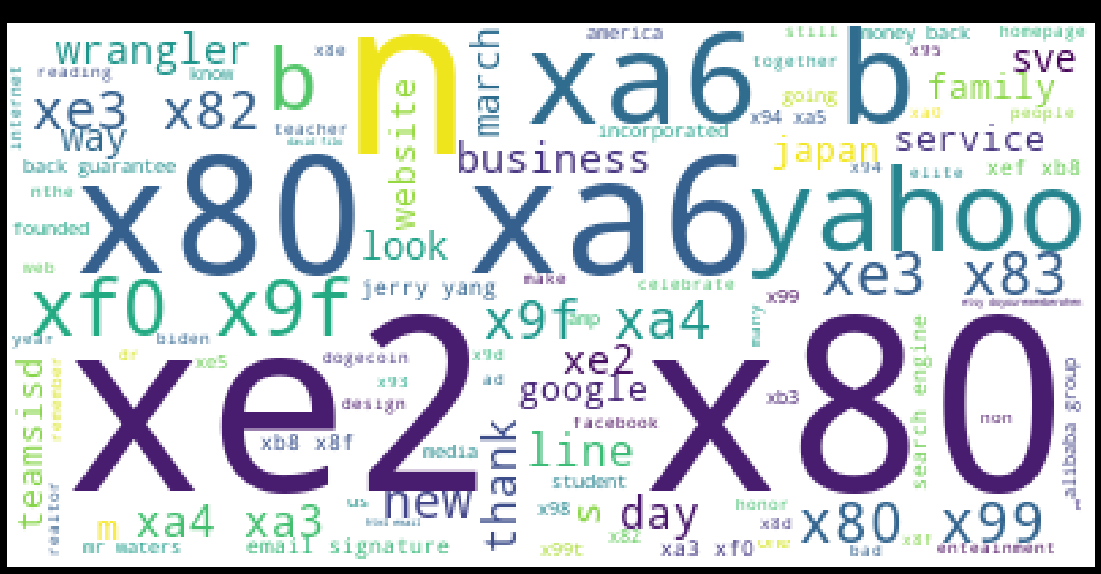

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display

def wordcloud(df,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in df[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Most common words")
wordcloud(df,'cleaned_tweet_text')

<h1><center>Cleaning the username and visualizing the top 20 users who tweeted</center></h1>

We cleaned the usernames in the dataframe and then used the pandas groupby method to get the count of the users who tweeted about the hashtag in the last 7 days and sort the users in descending order to better visualize the data, this allowed us to visualize the top 20 users who tweeted on twitter about the hashtag realted to stock market.We the plotted the top 20 users and created a bar graph to visualize the top 20 users.

In [27]:
df['cleaned_user_id'] = df['user_id'].str.replace("""b'""",'')
df['cleaned_user_id'] = df['cleaned_user_id'].str.replace("""'""",'')

In [28]:
df.cleaned_user_id.head(n=10)

0           Nuker_46
2     davidchenpanda
3        ajmikesmith
4         doge2mooon
5          Patsoup78
6         BenSMeyers
7         EtsyGrowth
8        AMWebSchool
9     Diego_Sisneros
10      mojilo_manas
Name: cleaned_user_id, dtype: object

In [29]:
top_user_tweeted = df.groupby('cleaned_user_id').size().sort_values(ascending=False).reset_index()

In [30]:
top_user_tweeted

,cleaned_user_id,0
0,doyourememberwh,5
1,SVista_ES,4
2,GetAssistNet,2
3,srqagent,2
4,BDorador_SVES,2
...,...,...
90,arirangtvnews,1
91,auto_wilber,1
92,aztecwarrior78,1
93,biznessavenue,1


In [31]:
top_user_tweeted.columns = ['user_name','count']

In [32]:
top_user_tweeted

,user_name,count
0,doyourememberwh,5
1,SVista_ES,4
2,GetAssistNet,2
3,srqagent,2
4,BDorador_SVES,2
...,...,...
90,arirangtvnews,1
91,auto_wilber,1
92,aztecwarrior78,1
93,biznessavenue,1


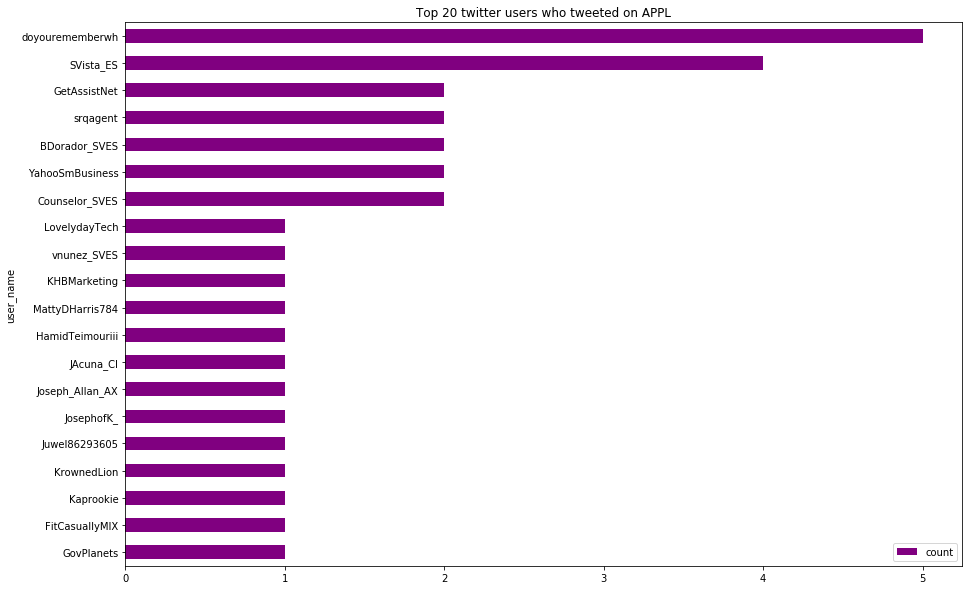

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))

# Plot horizontal bar graph
top_user_tweeted.head(20).sort_values(by='count').plot.barh(x='user_name',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Top 20 twitter users who tweeted on APPL")

plt.show()

<h1><center>Visualizing the data</center></h1>

1. __<a href='#5' target='_self'>Count of daily tweets</a>__
1. __<a href='#6' target='_self'>Count of daily user tweeting</a>__

To visulaize the data on number of daily tweets and the number of users that are tweeting from the past 7 days, we need to first convert our timestamp column to datetime column instead of an object i.e. string column to easily seperate and the days,year and month from the datetime field, this will allows the pandas to check that the field id datetime since its smart enough to recognize it and then we can easily count the tweets frequency with the pandas groupby function. We can then plot the graph with frequency of tweets on the particular day.We plotted bar graphs to visluazie the tweet frequency on particular days and also we plotted another graph to visualise the number of users who tweeted on each day in last seven days.


In [34]:
df['timestamp']= pd.to_datetime(df['timestamp'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 236
Data columns (total 9 columns):
timestamp                            107 non-null datetime64[ns]
tweet_text                           107 non-null object
user_id                              107 non-null object
tweet_id                             107 non-null float64
hashtag                              107 non-null object
cleaned_tweet_text                   107 non-null object
cleaned_tweet_text_excluded_words    107 non-null object
stemmed_data                         107 non-null object
cleaned_user_id                      107 non-null object
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 8.4+ KB


In [36]:
daily_tweets = df.groupby((df['timestamp'].dt.year, df['timestamp'].dt.month, df['timestamp'].dt.day)).count()

C:\Users\kshdu\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [37]:
daily_tweets

timestamp  tweet_text  user_id  tweet_id  \
timestamp timestamp timestamp                                             
2021      3         1                  3           3        3         3   
                    2                 53          53       53        53   
                    3                 29          29       29        29   
                    4                 22          22       22        22   

                               hashtag  cleaned_tweet_text  \
timestamp timestamp timestamp                                
2021      3         1                3                   3   
                    2               53                  53   
                    3               29                  29   
                    4               22                  22   

                               cleaned_tweet_text_excluded_words  \
timestamp timestamp timestamp                                      
2021      3         1                                          3   
                    2                                         53   
                    3                                         29   
                    4                                         22   

                               stemmed_data  cleaned_user_id  
timestamp timestamp timestamp                                 
2021      3         1                     3                3  
                    2                    53               53  
                    3                    29               29  
                    4                    22               22

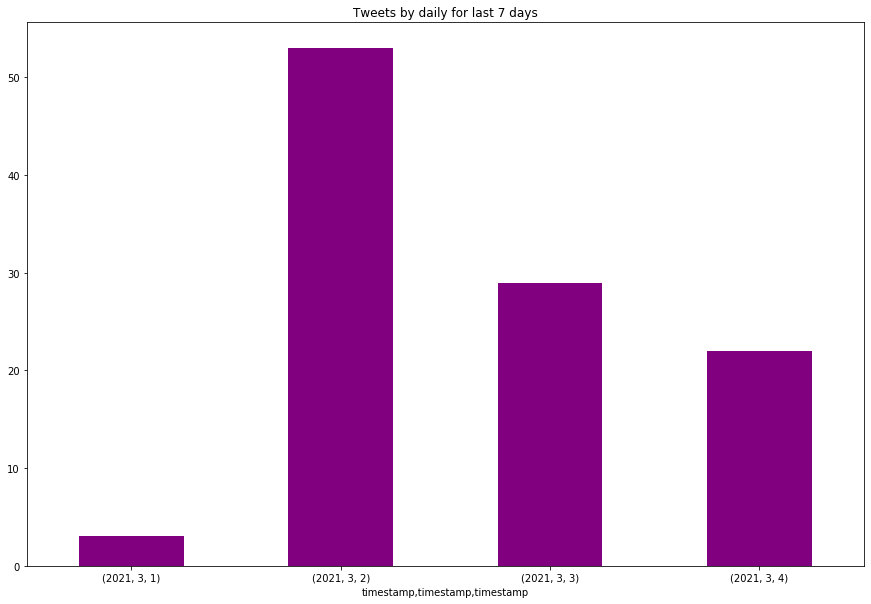

In [38]:
fig, ax = plt.subplots(figsize=(15, 10))
daily_tweets.timestamp.plot.bar(x ='date', y ='number of tweets',ax=ax,
                      color="purple")
plt.xticks(rotation=0)
ax.set_title("Tweets by daily for last 7 days")
plt.show()

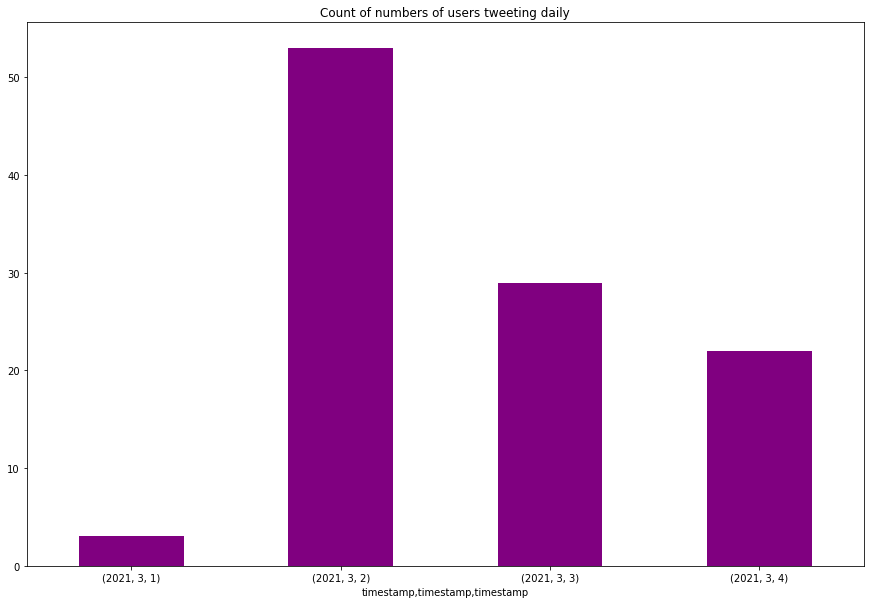

In [39]:
fig, ax = plt.subplots(figsize=(15, 10))
daily_tweets.user_id.plot.bar(x ='Date', y ='number of tweets',ax=ax,
                      color="purple")
plt.xticks(rotation=0)
ax.set_title("Count of numbers of users tweeting daily")
plt.show()

1. __<a href='#5' target='_self'>Refrences</a>__
    1. __<a href='#5A' target='_self'>https://www.python.org/doc/</a>__
    1. __<a href='#5B' target='_self'>https://dev.twitter.com/overview/documentation</a>__
    1. __<a href='#5C' target='_self'>https://www.kaggle.com/</a>__

<h1><center>Conclusion</center></h1>

Learned basics of scraping data from twitter and how to store it into different file formats, how to fetch data from twitter.Challenges faced: retrieving data from twitter with tweepy since the rate limit is quiet less for single call and the rate limit hits and we had to wait for 15 minutes to again scrape data from twitter. While researching this issue, came accross an intresting module which is built especially for this and with this module you can easily retrieve data from twitter without having to use your credentails. The module is called twint and this information was found while researching and studying on Kaggle, the link is: - https://github.com/twintproject/twint

Gained a very good bit of experince in the following:-
1. __<a href='#1' target='_self'>Collecting data from Twitter using Twitter API</a>__
1. __<a href='#2' target='_self'>Data storage to store the data and query</a>__
1. __<a href='#3' target='_self'>Collecting real-time data</a>__
1. __<a href='#4' target='_self'>Data cleaning</a>__
1. __<a href='#5' target='_self'>Visualizing the data</a>__